<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Promedios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xl = '/content/drive/MyDrive/Variables ambientales.xlsx'
data = pd.read_excel(xl)
df = data
data

,municipio,t defunciones,t confirmados,humidex,imeca (pm2.5),imeca so2,imeca co,imeca no2,imeca (pm 10),imeca o3
0,Guanajuato,0.000163,0.001998,33.684398,39.966475,NaN,NaN,NaN,NaN,NaN
1,Acámbaro,0.000184,0.002330,35.377410,NaN,NaN,NaN,NaN,NaN,NaN
2,Apaseo el Alto,0.000072,0.001021,33.797447,NaN,NaN,NaN,NaN,NaN,NaN
3,Atarjea,0.000000,0.000330,36.573567,NaN,NaN,NaN,NaN,NaN,NaN
4,Celaya,0.000209,0.002162,36.652243,51.781560,8.326559,21.311949,5.919231,37.539495,33.693514
5,Comonfort,0.000053,0.000830,35.617712,NaN,NaN,NaN,NaN,NaN,NaN
6,Cuerámaro,0.000049,0.002329,36.119446,NaN,NaN,NaN,NaN,NaN,NaN
7,Coroneo,0.000000,0.002398,34.257636,NaN,NaN,NaN,NaN,NaN,NaN
8,Cortazar,0.000232,0.001995,34.864001,NaN,NaN,NaN,NaN,NaN,NaN
9,Huanímaro,0.000046,0.001834,33.311975,NaN,NaN,NaN,NaN,NaN,NaN


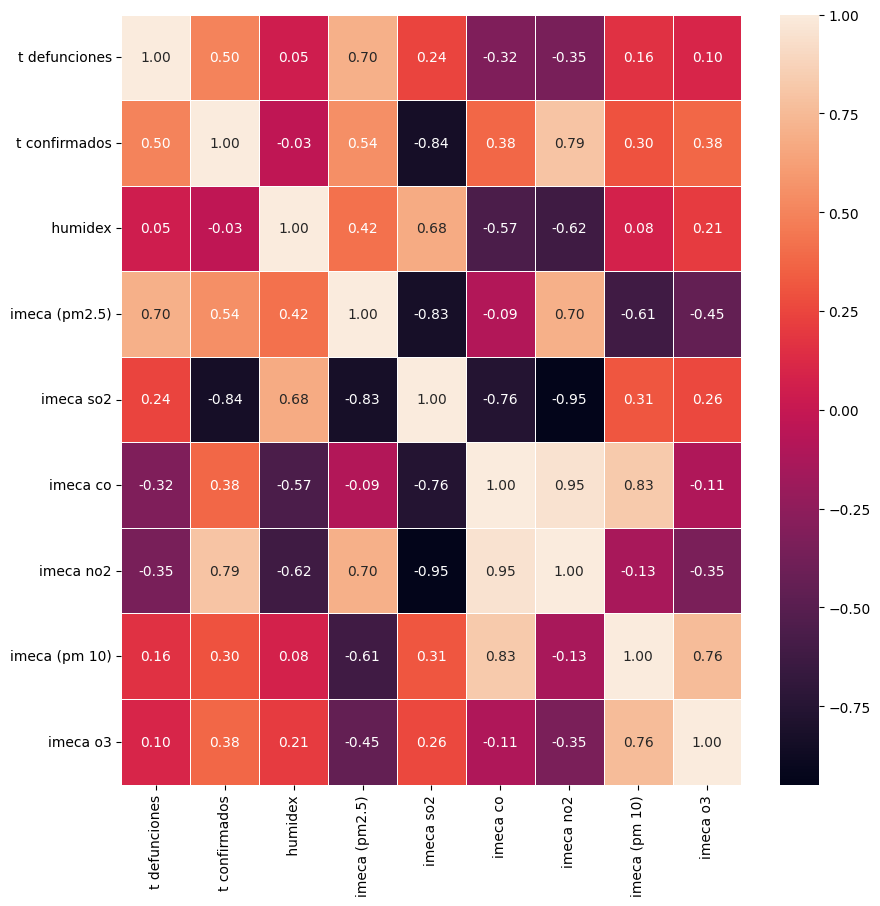

In [3]:
dfc = data.iloc[:, 1:]
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfc.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

<ipython-input-4-01e715008b01>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente


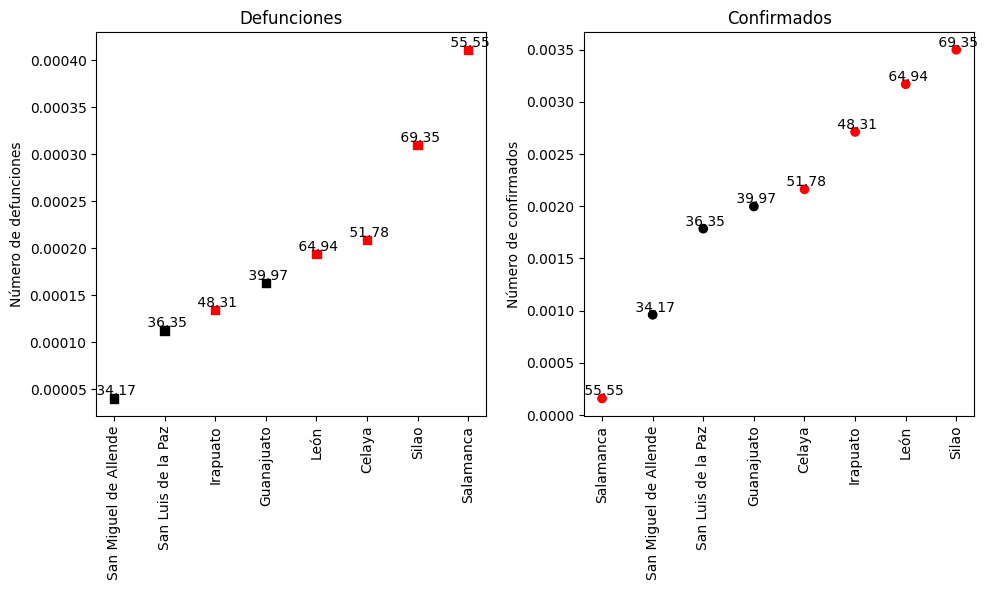

In [4]:
# Filtrar los municipios con valores en la columna "imeca (pm2.5)" y quitar 'Salamanca'
df_filtered = df[(df['imeca (pm2.5)'].notnull())]

#ordenar
df_sorted_defunciones = df_filtered.sort_values(by='t defunciones')

df_sorted_confirmados = df_filtered.sort_values(by='t confirmados')

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
ax.set_title('(pm 2.5 > 45 rojo)')
# Colores para los puntos según imeca
colors = ['red' if imeca > 45 else 'black' for imeca in df_sorted_defunciones['imeca (pm2.5)']]

scatter_defunciones = axs[0].scatter(df_sorted_defunciones['municipio'], df_sorted_defunciones['t defunciones'], label='t defunciones', color=colors, marker='s')
axs[0].set_title('Defunciones')
axs[0].set_ylabel('Número de defunciones')

colors_confirmados = ['red' if imeca > 45 else 'black' for imeca in df_sorted_confirmados['imeca (pm2.5)']]

scatter_confirmados = axs[1].scatter(df_sorted_confirmados['municipio'], df_sorted_confirmados['t confirmados'], label='t confirmados', color=colors_confirmados, marker='o')
axs[1].set_title('Confirmados')
axs[1].set_ylabel('Número de confirmados')


for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

# Agregar etiquetas
for municipio, defunciones, imeca in zip(df_sorted_defunciones['municipio'], df_sorted_defunciones['t defunciones'], df_sorted_defunciones['imeca (pm2.5)']):
    axs[0].text(municipio, defunciones, f' {imeca:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Agregar etiquetas
for municipio, confirmados, imeca in zip(df_sorted_confirmados['municipio'], df_sorted_confirmados['t confirmados'], df_sorted_confirmados['imeca (pm2.5)']):
    axs[1].text(municipio, confirmados, f' {imeca:.2f}', ha='center', va='bottom')  # Formato con dos decimales

plt.tight_layout()
plt.show()



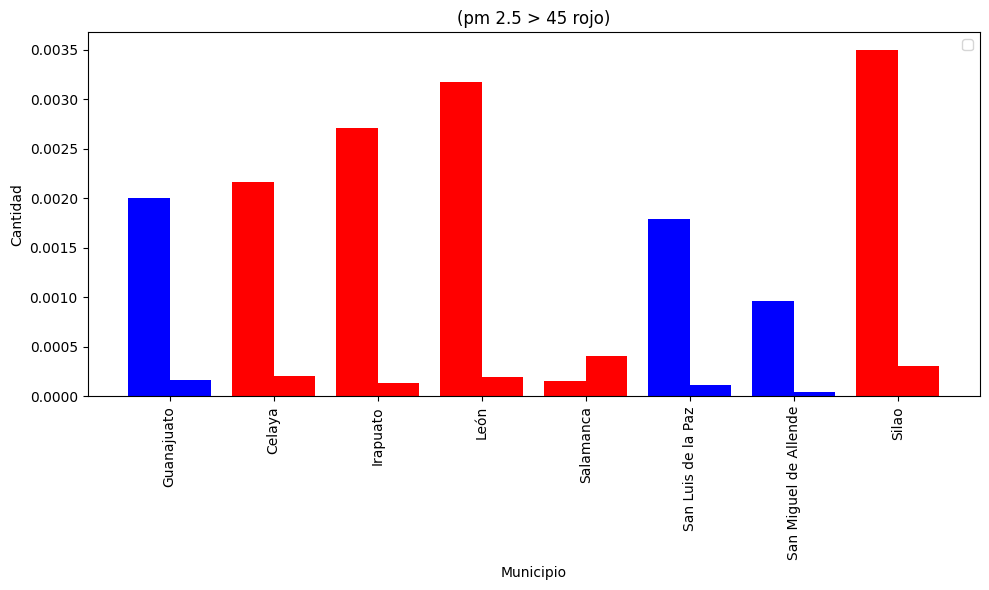

In [5]:
data_filtered = data[data['imeca (pm2.5)'].notna()]


fig, ax = plt.subplots(figsize=(10, 6))


colors = ['blue' if imeca <= 45 else 'red' for imeca in data_filtered['imeca (pm2.5)']]


indices = range(len(data_filtered))

ax.bar(indices, data_filtered['t confirmados'], color=colors, width=0.4, align='center')
ax.bar([i + 0.4 for i in indices], data_filtered['t defunciones'], color=colors, width=0.4, align='center')

ax.set_xlabel('Municipio')
ax.set_ylabel('Cantidad')
ax.set_title('(pm 2.5 > 45 rojo)')
ax.legend()


ax.set_xticks([i + 0.2 for i in indices])
ax.set_xticklabels(data_filtered['municipio'], rotation=90)


plt.tight_layout()
plt.show()

<ipython-input-6-d89165435359>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente


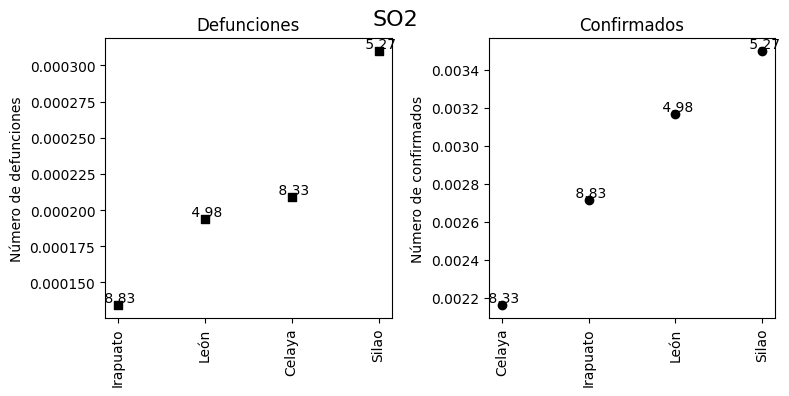

In [6]:

df_filtered = df[(df['imeca so2'].notnull()) & (df['municipio'] != 'Salamanca')]
df_sorted_defunciones = df_filtered.sort_values(by='t defunciones')
df_sorted_confirmados = df_filtered.sort_values(by='t confirmados')
fig, axs = plt.subplots(1, 2, figsize=(8, 4))


scatter_defunciones = axs[0].scatter(df_sorted_defunciones['municipio'], df_sorted_defunciones['t defunciones'], label='t defunciones', color='black', marker='s')
axs[0].set_title('Defunciones')
axs[0].set_ylabel('Número de defunciones')


scatter_confirmados = axs[1].scatter(df_sorted_confirmados['municipio'], df_sorted_confirmados['t confirmados'], label='t confirmados', color='black', marker='o')
axs[1].set_title('Confirmados')
axs[1].set_ylabel('Número de confirmados')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
for municipio, defunciones, imeca in zip(df_sorted_defunciones['municipio'], df_sorted_defunciones['t defunciones'], df_sorted_defunciones['imeca so2']):
    axs[0].text(municipio, defunciones, f' {imeca:.2f}', ha='center', va='bottom')
for municipio, confirmados, imeca in zip(df_sorted_confirmados['municipio'], df_sorted_confirmados['t confirmados'], df_sorted_confirmados['imeca so2']):
    axs[1].text(municipio, confirmados, f' {imeca:.2f}', ha='center', va='bottom')

plt.tight_layout()
fig.suptitle('SO2', fontsize=16)
plt.show()


<ipython-input-7-fbe77168d601>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente


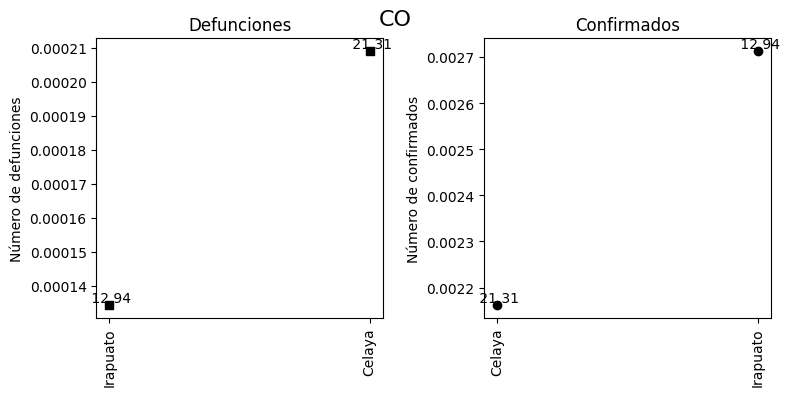

In [7]:
# Filtrar los municipios con valores en la columna "imeca co" y quitar 'Salamanca'
df_filtered_co = df[(df['imeca co'].notnull()) & (df['municipio'] != 'Salamanca')]

# Ordenar los municipios de menor a mayor según el valor de "t defunciones"
df_sorted_defunciones_co = df_filtered_co.sort_values(by='t defunciones')

# Ordenar los municipios de menor a mayor según el valor de "t confirmados"
df_sorted_confirmados_co = df_filtered_co.sort_values(by='t confirmados')

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subgráfico para defunciones
scatter_defunciones_co = axs[0].scatter(df_sorted_defunciones_co['municipio'], df_sorted_defunciones_co['t defunciones'], label='t defunciones', color='black', marker='s')
axs[0].set_title('Defunciones')
axs[0].set_ylabel('Número de defunciones')

# Subgráfico para confirmados
scatter_confirmados_co = axs[1].scatter(df_sorted_confirmados_co['municipio'], df_sorted_confirmados_co['t confirmados'], label='t confirmados', color='black', marker='o')
axs[1].set_title('Confirmados')
axs[1].set_ylabel('Número de confirmados')

# Rotar los nombres de los municipios en ambos subgráficos
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente

# Agregar etiquetas de imeca co a los puntos en el subgráfico de defunciones
for municipio, defunciones, imeca_co in zip(df_sorted_defunciones_co['municipio'], df_sorted_defunciones_co['t defunciones'], df_sorted_defunciones_co['imeca co']):
    axs[0].text(municipio, defunciones, f' {imeca_co:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Agregar etiquetas de imeca co a los puntos en el subgráfico de confirmados
for municipio, confirmados, imeca_co in zip(df_sorted_confirmados_co['municipio'], df_sorted_confirmados_co['t confirmados'], df_sorted_confirmados_co['imeca co']):
    axs[1].text(municipio, confirmados, f' {imeca_co:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Ajustar espacio entre subgráficos
plt.tight_layout()

# Agregar título sobre los subgráficos
fig.suptitle('CO', fontsize=16)

# Mostrar los subgráficos
plt.show()


<ipython-input-8-8e7b4e7e07f0>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente


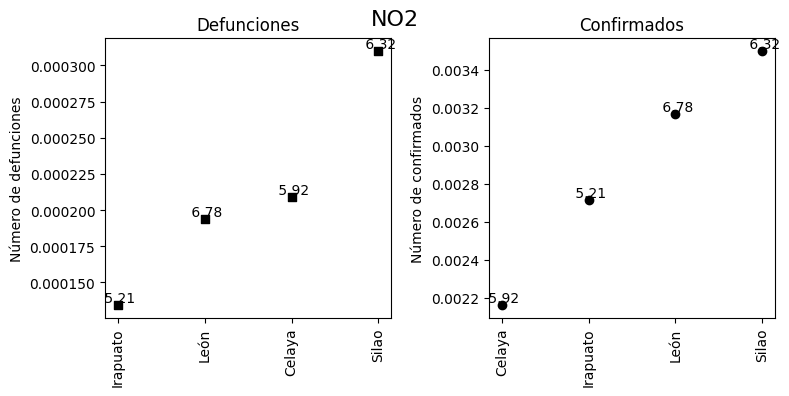

In [8]:
# Filtrar los municipios con valores en la columna "imeca no2" y quitar 'Salamanca'
df_filtered_no2 = df[(df['imeca no2'].notnull()) & (df['municipio'] != 'Salamanca')]

# Ordenar los municipios de menor a mayor según el valor de "t defunciones"
df_sorted_defunciones_no2 = df_filtered_no2.sort_values(by='t defunciones')

# Ordenar los municipios de menor a mayor según el valor de "t confirmados"
df_sorted_confirmados_no2 = df_filtered_no2.sort_values(by='t confirmados')

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subgráfico para defunciones
scatter_defunciones_no2 = axs[0].scatter(df_sorted_defunciones_no2['municipio'], df_sorted_defunciones_no2['t defunciones'], label='t defunciones', color='black', marker='s')
axs[0].set_title('Defunciones')
axs[0].set_ylabel('Número de defunciones')

# Subgráfico para confirmados
scatter_confirmados_no2 = axs[1].scatter(df_sorted_confirmados_no2['municipio'], df_sorted_confirmados_no2['t confirmados'], label='t confirmados', color='black', marker='o')
axs[1].set_title('Confirmados')
axs[1].set_ylabel('Número de confirmados')

# Rotar los nombres de los municipios en ambos subgráficos
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente

# Agregar etiquetas de imeca no2 a los puntos en el subgráfico de defunciones
for municipio, defunciones, imeca_no2 in zip(df_sorted_defunciones_no2['municipio'], df_sorted_defunciones_no2['t defunciones'], df_sorted_defunciones_no2['imeca no2']):
    axs[0].text(municipio, defunciones, f' {imeca_no2:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Agregar etiquetas de imeca no2 a los puntos en el subgráfico de confirmados
for municipio, confirmados, imeca_no2 in zip(df_sorted_confirmados_no2['municipio'], df_sorted_confirmados_no2['t confirmados'], df_sorted_confirmados_no2['imeca no2']):
    axs[1].text(municipio, confirmados, f' {imeca_no2:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Ajustar espacio entre subgráficos
plt.tight_layout()

# Agregar título sobre los subgráficos
fig.suptitle('NO2', fontsize=16)

# Mostrar los subgráficos
plt.show()


<ipython-input-9-d0c04a842553>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente


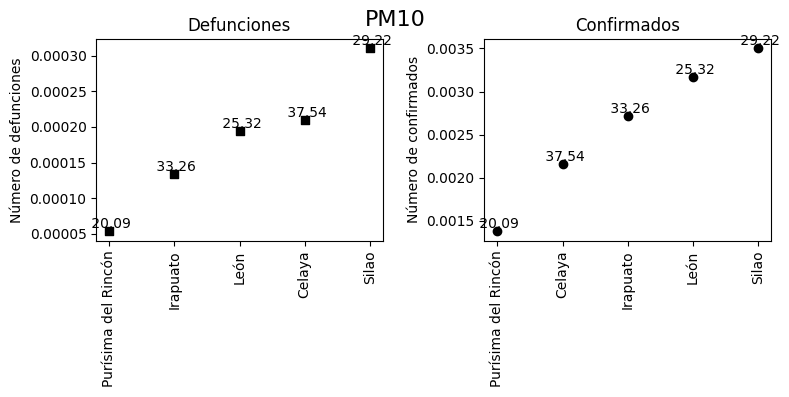

In [9]:
# Filtrar los municipios con valores en la columna "imeca (pm 10)" y quitar 'Salamanca'
df_filtered_pm10 = df[(df['imeca (pm 10)'].notnull()) & (df['municipio'] != 'Salamanca')]

# Ordenar los municipios de menor a mayor según el valor de "t defunciones"
df_sorted_defunciones_pm10 = df_filtered_pm10.sort_values(by='t defunciones')

# Ordenar los municipios de menor a mayor según el valor de "t confirmados"
df_sorted_confirmados_pm10 = df_filtered_pm10.sort_values(by='t confirmados')

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subgráfico para defunciones
scatter_defunciones_pm10 = axs[0].scatter(df_sorted_defunciones_pm10['municipio'], df_sorted_defunciones_pm10['t defunciones'], label='t defunciones', color='black', marker='s')
axs[0].set_title('Defunciones')
axs[0].set_ylabel('Número de defunciones')

# Subgráfico para confirmados
scatter_confirmados_pm10 = axs[1].scatter(df_sorted_confirmados_pm10['municipio'], df_sorted_confirmados_pm10['t confirmados'], label='t confirmados', color='black', marker='o')
axs[1].set_title('Confirmados')
axs[1].set_ylabel('Número de confirmados')

# Rotar los nombres de los municipios en ambos subgráficos
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente

# Agregar etiquetas de imeca (pm 10) a los puntos en el subgráfico de defunciones
for municipio, defunciones, imeca_pm10 in zip(df_sorted_defunciones_pm10['municipio'], df_sorted_defunciones_pm10['t defunciones'], df_sorted_defunciones_pm10['imeca (pm 10)']):
    axs[0].text(municipio, defunciones, f' {imeca_pm10:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Agregar etiquetas de imeca (pm 10) a los puntos en el subgráfico de confirmados
for municipio, confirmados, imeca_pm10 in zip(df_sorted_confirmados_pm10['municipio'], df_sorted_confirmados_pm10['t confirmados'], df_sorted_confirmados_pm10['imeca (pm 10)']):
    axs[1].text(municipio, confirmados, f' {imeca_pm10:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Ajustar espacio entre subgráficos
plt.tight_layout()

# Agregar título sobre los subgráficos
fig.suptitle('PM10', fontsize=16)

# Mostrar los subgráficos
plt.show()


<ipython-input-10-0ad4d34d2eb2>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente


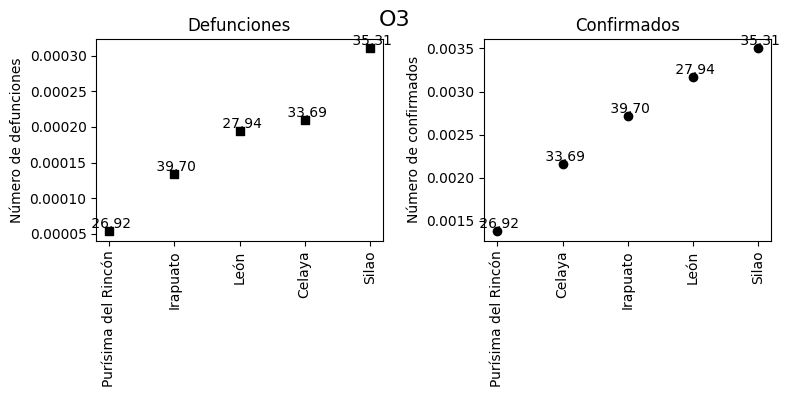

In [10]:

# Filtrar los municipios con valores en la columna "imeca o3" y quitar 'Salamanca'
df_filtered_o3 = df[(df['imeca o3'].notnull()) & (df['municipio'] != 'Salamanca')]

# Ordenar los municipios de menor a mayor según el valor de "t defunciones"
df_sorted_defunciones_o3 = df_filtered_o3.sort_values(by='t defunciones')

# Ordenar los municipios de menor a mayor según el valor de "t confirmados"
df_sorted_confirmados_o3 = df_filtered_o3.sort_values(by='t confirmados')

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subgráfico para defunciones
scatter_defunciones_o3 = axs[0].scatter(df_sorted_defunciones_o3['municipio'], df_sorted_defunciones_o3['t defunciones'], label='t defunciones', color='black', marker='s')
axs[0].set_title('Defunciones')
axs[0].set_ylabel('Número de defunciones')

# Subgráfico para confirmados
scatter_confirmados_o3 = axs[1].scatter(df_sorted_confirmados_o3['municipio'], df_sorted_confirmados_o3['t confirmados'], label='t confirmados', color='black', marker='o')
axs[1].set_title('Confirmados')
axs[1].set_ylabel('Número de confirmados')

# Rotar los nombres de los municipios en ambos subgráficos
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')  # Usar las etiquetas existentes y rotarlas verticalmente

# Agregar etiquetas de imeca o3 a los puntos en el subgráfico de defunciones
for municipio, defunciones, imeca_o3 in zip(df_sorted_defunciones_o3['municipio'], df_sorted_defunciones_o3['t defunciones'], df_sorted_defunciones_o3['imeca o3']):
    axs[0].text(municipio, defunciones, f' {imeca_o3:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Agregar etiquetas de imeca o3 a los puntos en el subgráfico de confirmados
for municipio, confirmados, imeca_o3 in zip(df_sorted_confirmados_o3['municipio'], df_sorted_confirmados_o3['t confirmados'], df_sorted_confirmados_o3['imeca o3']):
    axs[1].text(municipio, confirmados, f' {imeca_o3:.2f}', ha='center', va='bottom')  # Formato con dos decimales

# Ajustar espacio entre subgráficos
plt.tight_layout()

# Agregar título sobre los subgráficos
fig.suptitle('O3', fontsize=16)

# Mostrar los subgráficos
plt.show()

In [11]:

excel = '/content/drive/MyDrive/COVID-19 (Emisiones LMP, Humidex y Beaufort).xlsx'

# Cargar el archivo Excel
xl = pd.ExcelFile(excel)

# Lista de municipios
municipios = ['Guanajuato', 'Celaya', 'Irapuato', 'León', 'San Luis de la Paz', 'San Miguel de Allende', 'Silao', 'Salamanca', 'Purísima del Rincón']

# Diccionario para almacenar los DataFrames de cada municipio
dfs = {}

for municipio in municipios:
    # Cargar los datos de la hoja correspondiente al municipio
    df = xl.parse(municipio, skiprows=2)

    # Limpiar los nombres de las columnas y convertirlos a minúsculas
    df.columns = df.columns.str.replace(".", "").str.strip().str.lower()

    # Buscar columnas que contengan 'imeca (pm25)', 'total defunciones' y 'total confirmados' en su nombre
    columns_to_keep = [col for col in df.columns if 'imeca (pm25)' in col or col in ['total defunciones', 'total confirmados']]

    # Crear un nuevo DataFrame con las columnas seleccionadas
    df = df[columns_to_keep]

    # Reemplazar '#VALUE!' con NaN
    df = df.replace('#VALUE!', pd.NA)

    # Convertir el DataFrame a numérico
    df = df.apply(pd.to_numeric, errors='coerce')

    # Eliminar filas con valores NaN en cualquier columna
    df.dropna(how='any', inplace=True)

    # Calcular el promedio de las columnas 'imeca (pm25)' y actualizar el DataFrame
    df_imeca = pd.DataFrame(df[[col for col in df.columns if 'imeca (pm25)' in col]].mean(axis=1), columns=['imeca_pm25'])

    # Agregar las columnas 'total defunciones' y 'total confirmados' al DataFrame 'imeca'
    df_imeca['total defunciones'] = df['total defunciones']
    df_imeca['total confirmados'] = df['total confirmados']

    # Almacenar el DataFrame en el diccionario
    dfs[municipio] = df_imeca




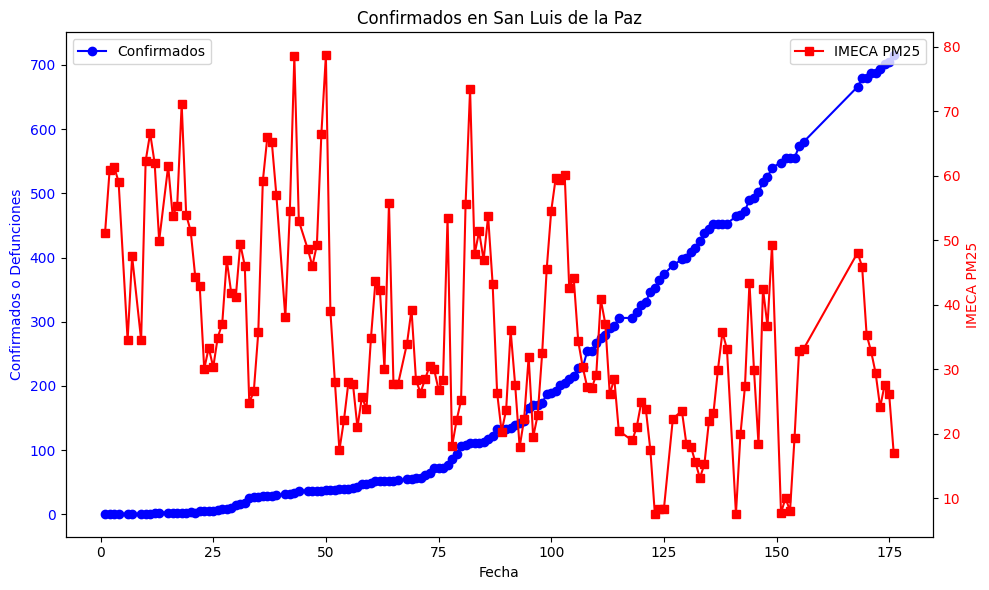

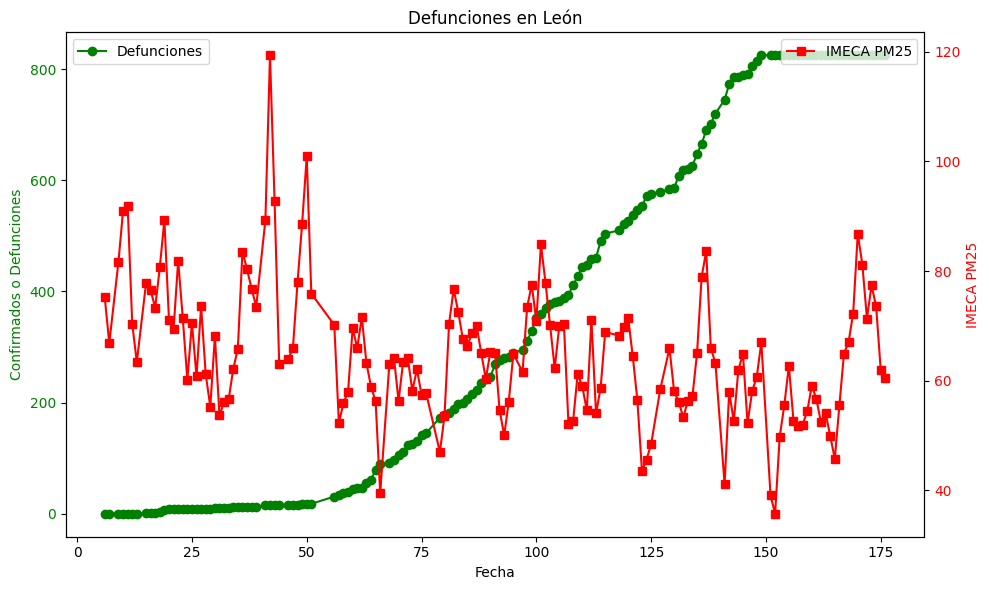

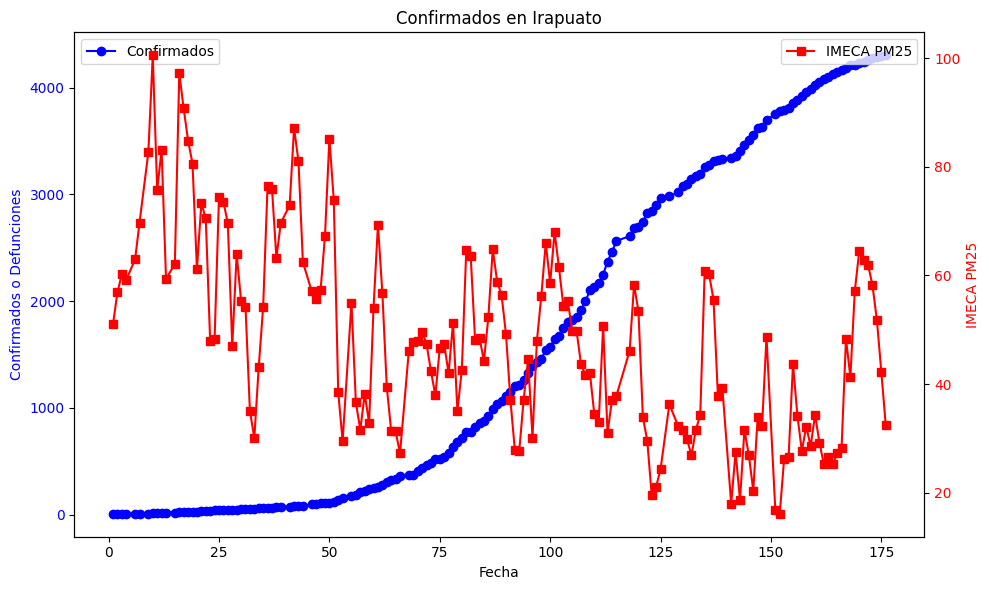

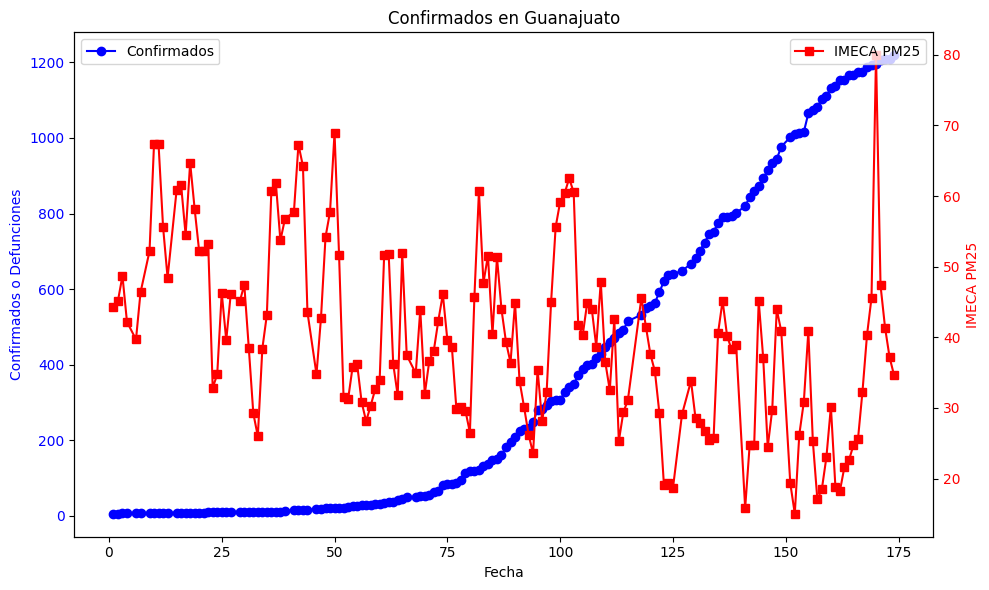

In [13]:

def plot_data(df, municipio, tipo):
    # Crear una figura y ejes para la gráfica
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Seleccionar los datos según el tipo (confirmados o defunciones)
    if tipo == 'confirmados':
        y_data = df['total confirmados']
        title = f'Confirmados en {municipio}'
        color = 'b'
    elif tipo == 'defunciones':
        y_data = df['total defunciones']
        title = f'Defunciones en {municipio}'
        color = 'g'
    else:
        raise ValueError("Tipo de datos no válido. Debe ser 'confirmados' o 'defunciones'.")

    # Graficar los datos de confirmados o defunciones
    ax1.plot(df.index, y_data, marker='o', color=color, label=tipo.capitalize())

    # Configurar el eje y1 (izquierdo) para confirmados o defunciones
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Confirmados o Defunciones', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Crear un segundo eje y (derecho) para IMECA PM25
    ax2 = ax1.twinx()
    ax2.plot(df.index, df['imeca_pm25'], color='r', marker='s', label='IMECA PM25')
    ax2.set_ylabel('IMECA PM25', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.legend(loc='upper right')

    # Configuraciones adicionales
    ax1.set_title(title)
    plt.tight_layout()
    plt.show()

# Definir los casos específicos que quieres graficar
casos = {
    'San Luis de la Paz': ('confirmados', dfs['San Luis de la Paz']),
    'León': ('defunciones', dfs['León']),
    'Irapuato': ('confirmados', dfs['Irapuato']),
    'Guanajuato': ('confirmados', dfs['Guanajuato'])
}

# Graficar los casos específicos
for municipio, (tipo, df) in casos.items():
    plot_data(df, municipio, tipo)



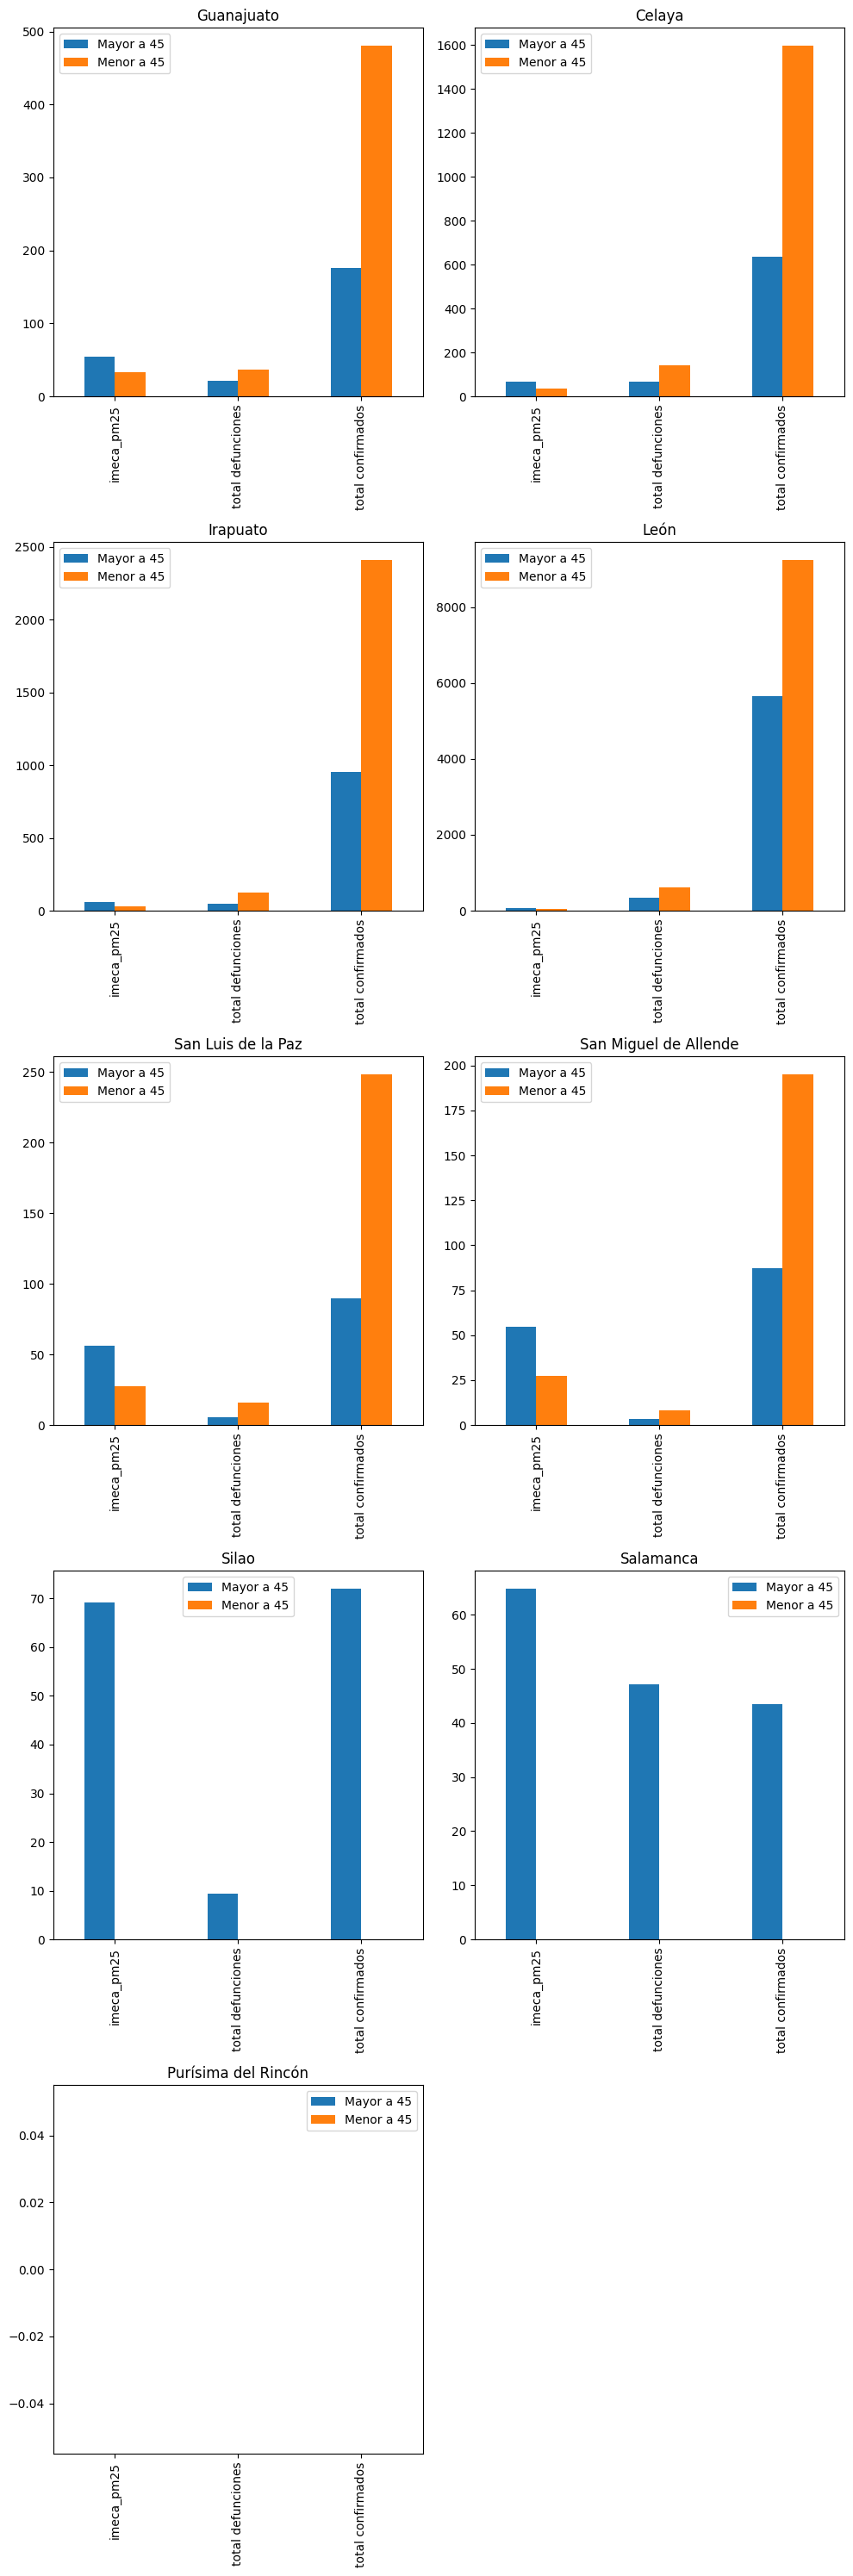

In [14]:


# Definir la función para calcular los promedios y graficar
def calcular_promedios_y_graficar(df, estado):
    # Calcular los promedios
    promedio_mayor_45 = df[df['imeca_pm25'] > 45][['imeca_pm25', 'total defunciones', 'total confirmados']].mean()
    promedio_menor_45 = df[df['imeca_pm25'] < 45][['imeca_pm25', 'total defunciones', 'total confirmados']].mean()

    # Crear un DataFrame para las gráficas
    data = pd.DataFrame({
        'Mayor a 45': promedio_mayor_45,
        'Menor a 45': promedio_menor_45
    })

    # Devolver el DataFrame
    return data

# Aplicar la función a cada estado
dataframes = {estado: calcular_promedios_y_graficar(df_estado, estado) for estado, df_estado in dfs.items()}

# Calcular el número de filas y columnas para las gráficas
n = len(dataframes)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Crear una figura para todas las gráficas
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 6 * nrows))

# Aplanar el array de ejes
axs = axs.flatten()

# Graficar cada estado
for ax, (estado, data) in zip(axs, dataframes.items()):
    data.plot(kind='bar', ax=ax)
    ax.set_title(estado)

# Eliminar los ejes vacíos
for i in range(n, nrows*ncols):
    fig.delaxes(axs[i])

# Ajustar el layout
plt.tight_layout()
plt.show()




In [15]:
dfo = {}

for municipio in municipios:
    df = xl.parse(municipio, skiprows=2)
    df.columns = df.columns.str.replace(".", "").str.strip().str.lower()
    columns_to_keep = [col for col in df.columns if 'imeca o3' in col or col in ['total defunciones', 'total confirmados']]
    df = df[columns_to_keep]

    # Reemplazar '#VALUE!' con NaN
    df = df.replace('#VALUE!', pd.NA)

    # Convertir el DataFrame a numérico
    df = df.apply(pd.to_numeric, errors='coerce')

    # Eliminar filas con valores NaN en cualquier columna
    df.dropna(how='any', inplace=True)

    # Calcular el promedio de las columnas 'imeca (pm25)' y actualizar el DataFrame
    df_imeca = pd.DataFrame(df[[col for col in df.columns if 'imeca o3' in col]].mean(axis=1), columns=['imeca o3'])

    # Agregar las columnas 'total defunciones' y 'total confirmados' al DataFrame 'imeca'
    df_imeca['total defunciones'] = df['total defunciones']
    df_imeca['total confirmados'] = df['total confirmados']

    # Almacenar el DataFrame en el diccionario
    dfo[municipio] = df_imeca




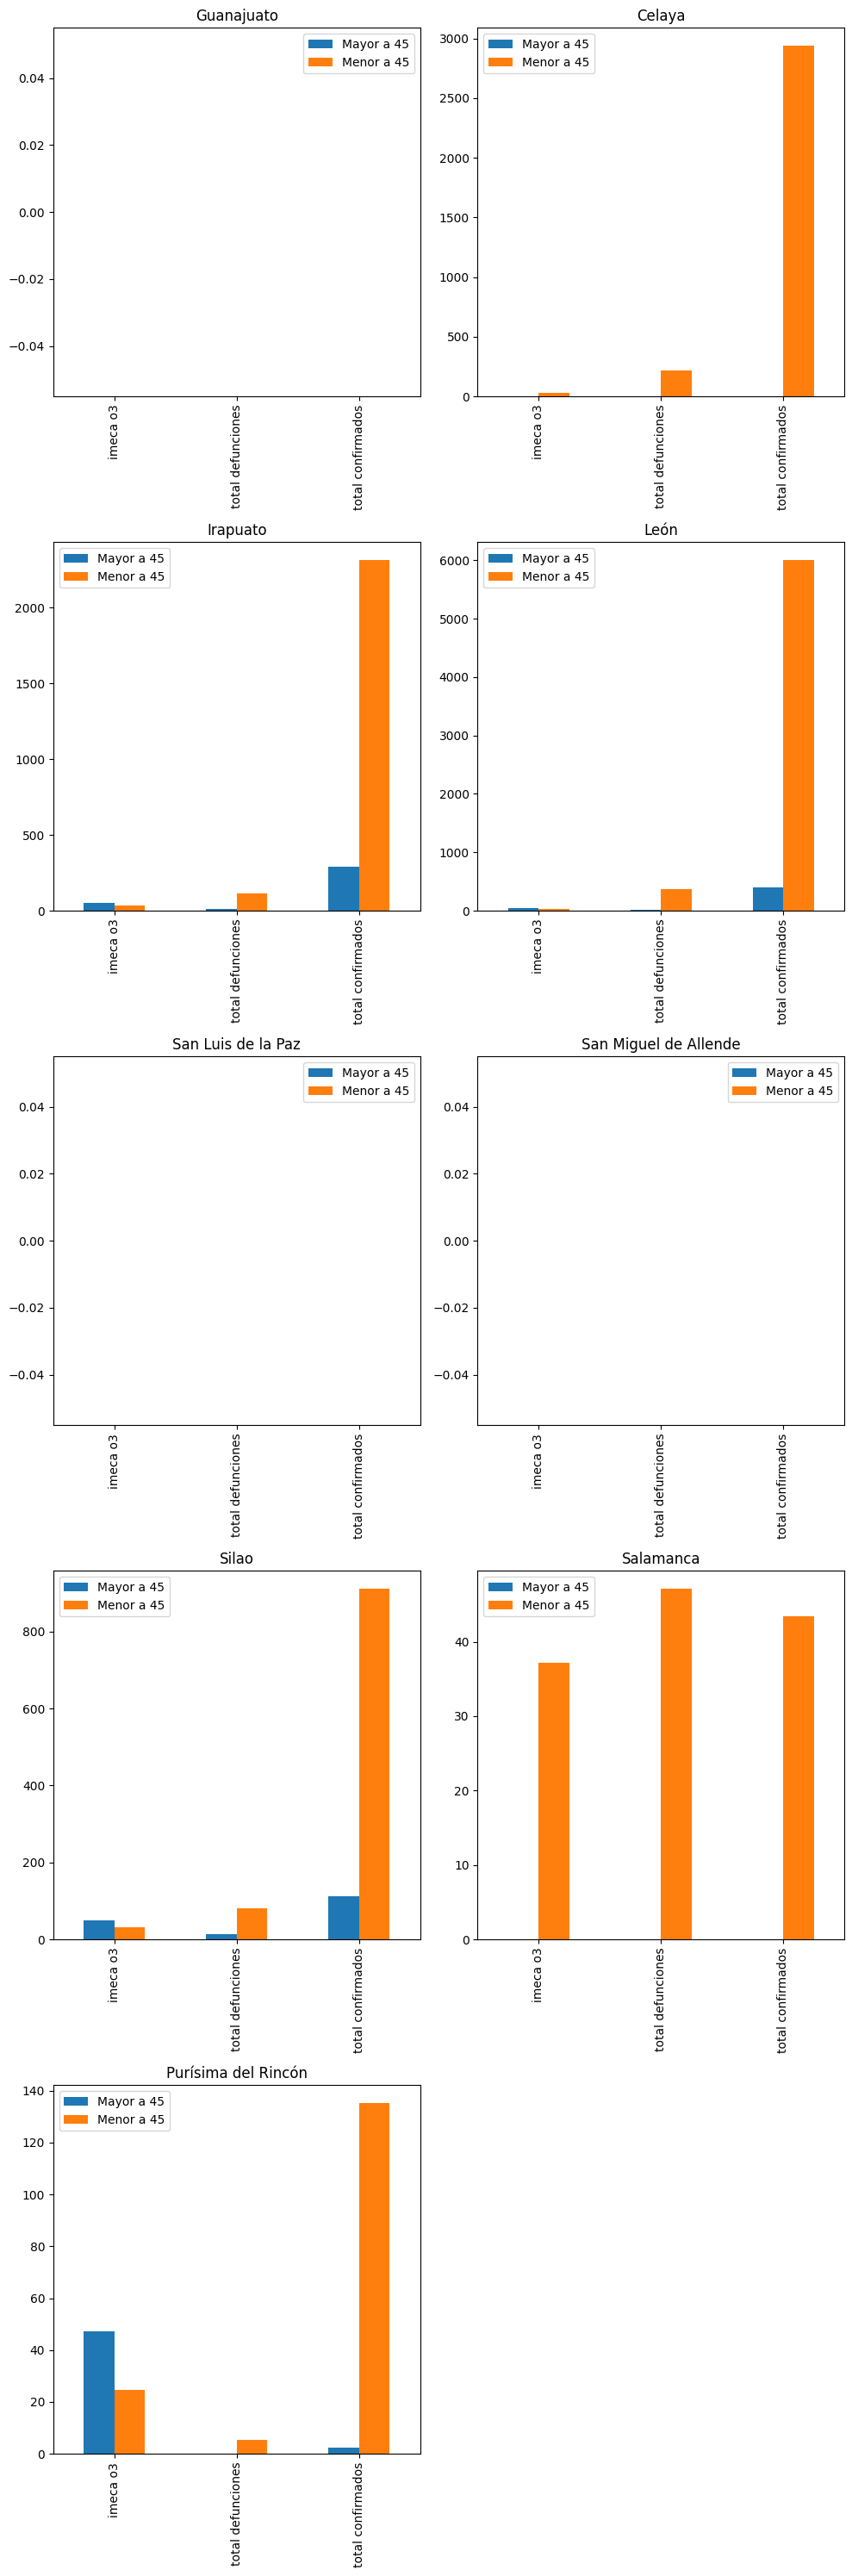

In [17]:

def calcular_promedios_y_graficar(df, estado):
    # Calcular los promedios
    promedio_mayor_50 = df[df['imeca o3'] > 45][['imeca o3', 'total defunciones', 'total confirmados']].mean()
    promedio_menor_50 = df[df['imeca o3'] < 45][['imeca o3', 'total defunciones', 'total confirmados']].mean()

    # Crear un DataFrame para las gráficas
    data = pd.DataFrame({
        'Mayor a 45': promedio_mayor_50,
        'Menor a 45': promedio_menor_50
    })

    # Devolver el DataFrame
    return data

# Aplicar la función a cada estado
dataframes = {estado: calcular_promedios_y_graficar(df_estado, estado) for estado, df_estado in dfo.items()}

# Calcular el número de filas y columnas para las gráficas
n = len(dataframes)
ncols = 2
nrows = n // ncols + (n % ncols > 0)


fig, axs = plt.subplots(nrows, ncols, figsize=(10, 6 * nrows))

axs = axs.flatten()

for ax, (estado, data) in zip(axs, dataframes.items()):
    data.plot(kind='bar', ax=ax)
    ax.set_title(estado)

# Eliminar los ejes vacíos
for i in range(n, nrows*ncols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [18]:


dfp = {}

for municipio in municipios:
    df = xl.parse(municipio, skiprows=2)
    df.columns = df.columns.str.replace(".", "").str.strip().str.lower()
    columns_to_keep = [col for col in df.columns if 'imeca (pm 10)' in col or col in ['total defunciones', 'total confirmados']]

    df = df[columns_to_keep]
    df = df.replace('#VALUE!', pd.NA)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(how='any', inplace=True)
    df_imeca = pd.DataFrame(df[[col for col in df.columns if 'imeca (pm 10)' in col]].mean(axis=1), columns=['imeca (pm 10)'])


    df_imeca['total defunciones'] = df['total defunciones']
    df_imeca['total confirmados'] = df['total confirmados']


    dfp[municipio] = df_imeca



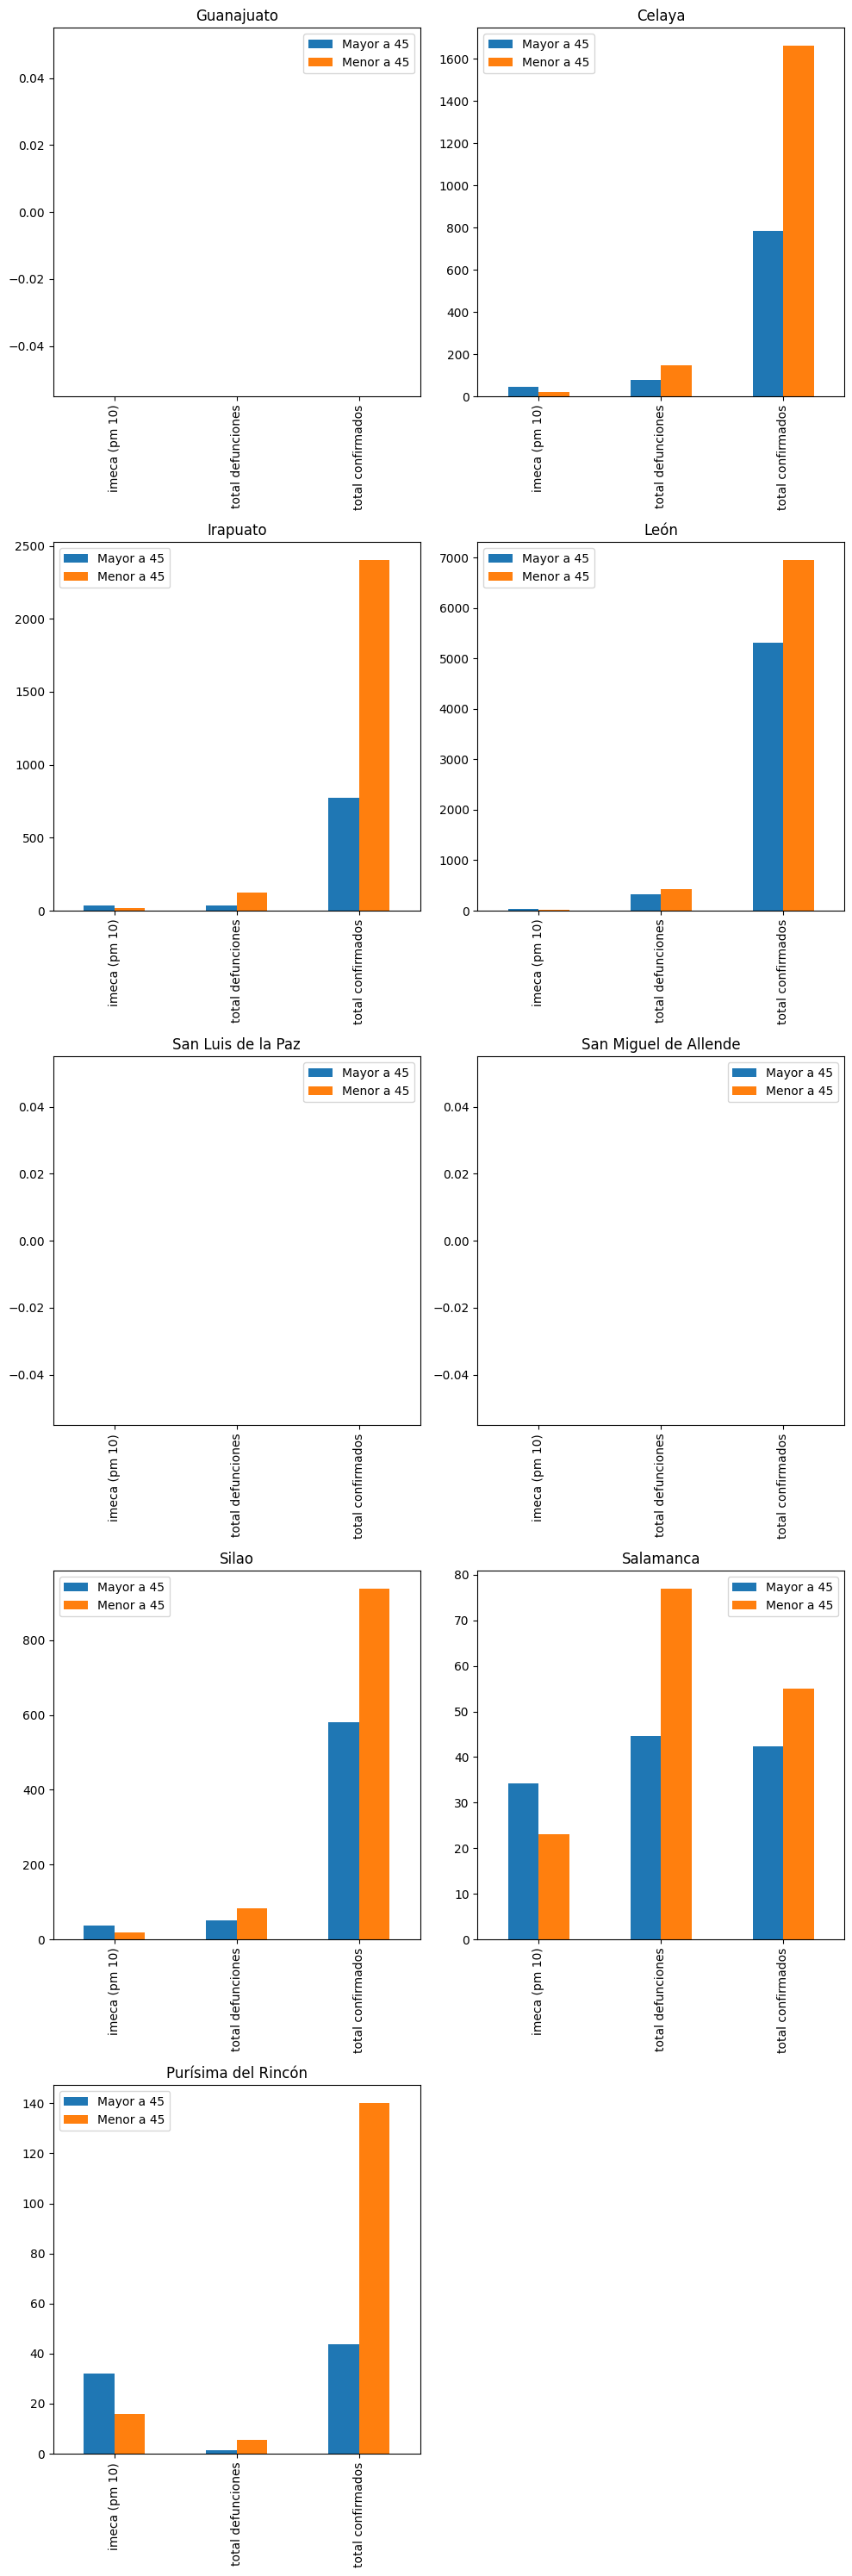

In [20]:

def calcular_promedios_y_graficar(df, estado):
    promedio_mayor_50 = df[df['imeca (pm 10)'] > 25][['imeca (pm 10)', 'total defunciones', 'total confirmados']].mean()
    promedio_menor_50 = df[df['imeca (pm 10)'] < 25][['imeca (pm 10)', 'total defunciones', 'total confirmados']].mean()
    data = pd.DataFrame({
        'Mayor a 45': promedio_mayor_50,
        'Menor a 45': promedio_menor_50
    })
    return data

dataframes = {estado: calcular_promedios_y_graficar(df_estado, estado) for estado, df_estado in dfp.items()}

n = len(dataframes)
ncols = 2
nrows = n // ncols + (n % ncols > 0)
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 6 * nrows))
axs = axs.flatten()

for ax, (estado, data) in zip(axs, dataframes.items()):
    data.plot(kind='bar', ax=ax)
    ax.set_title(estado)


for i in range(n, nrows*ncols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()